# 1. Usare API di Whisky Hunter per scaricare dati in formato JSON e analizzarli dall'interno di un Jupiter Notebook

Ad esempio quando è stata venduta la bottiglia più cara e a che prezzo?

[WhiskyHunter](https://whiskyhunter.net/api/)

## Tool preps

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url = "https://whiskyhunter.net/api/auctions_data/"

response = requests.get(url)

data = response.json()

df = pd.DataFrame(data)

## Analisi dei dati del dizionario

Ogni row (e quindi ogni dizionario nel file json)rappresenta i dati di una singola asta di whisky con informazioni come:

1. **dt (Data)**
- Tipo: Stringa (es. "2025-01-01")
- Descrizione: La data dell'asta. È utile per analizzare come le aste evolvono nel tempo, osservando le tendenze stagionali o annuali.
2. **winning_bid_max** (Offerta massima)
- Tipo: Float (es. 11064.6)
- Descrizione: L'importo dell'offerta più alta fatta durante l'asta. Può essere utile per analizzare la domanda e l'interesse per articoli rari o di valore.
3. **winning_bid_min** (Offerta minima)
- Tipo: Float (es. 10.6)
- Descrizione: L'offerta più bassa ricevuta durante l'asta. Questo valore può dare indicazioni sul prezzo di partenza o sugli articoli meno ricercati.
4. **winning_bid_mean** (Offerta media)
- Tipo: Float (es. 263.94)
- Descrizione: Il valore medio delle offerte fatte durante l'asta. È utile per comprendere il "range" medio dei prezzi di vendita e fare analisi statistiche.
5. **auction_trading_volume** (Volume di scambi)
- Tipo: Float (es. 211153.7)
- Descrizione: Il volume totale delle transazioni dell'asta, ovvero la somma di tutte le offerte accettate. Può indicare l'attività complessiva dell'asta in termini di valore.
6. **auction_lots_count** (Numero di lotti)
- Tipo: Intero (es. 800)
- Descrizione: Il numero totale di lotti (articoli) messi all'asta. Questo può darti un'idea della dimensione dell'asta e del numero di prodotti in gioco.
7. **all_auctions_lots_count** (Numero totale di lotti in tutte le aste)
- Tipo: Intero (es. 40090)
- Descrizione: Il numero totale di lotti venduti in tutte le aste, non solo in quella specifica. Utile per vedere quanto l'asta corrente si inserisce in un contesto più ampio di vendite.
8. **auction_name** (Nome dell'asta)
- Tipo: Stringa (es. "Australian Whisky Auctions")
- Descrizione: Il nome dell'asta. Potresti usarlo per analizzare quali aste specifiche hanno un impatto maggiore o per segmentare i dati per nome dell'asta.
9. **auction_slug** (Slug dell'asta)
- Tipo: Stringa (es. "australian-whisky-auctions")
- Descrizione: Una versione semplificata e "url-friendly" del nome dell'asta, utile se vuoi fare analisi in base a identificatori unici dell'asta o segmentare i dati.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dt                       2226 non-null   datetime64[ns]
 1   winning_bid_max          2226 non-null   float64       
 2   winning_bid_min          2226 non-null   float64       
 3   winning_bid_mean         2226 non-null   float64       
 4   auction_trading_volume   2226 non-null   float64       
 5   auction_lots_count       2226 non-null   int64         
 6   all_auctions_lots_count  2226 non-null   int64         
 7   auction_name             2226 non-null   object        
 8   auction_slug             2226 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 156.6+ KB


In [52]:
df.head()

,dt,winning_bid_max,winning_bid_min,winning_bid_mean,auction_trading_volume,auction_lots_count,all_auctions_lots_count,auction_name,auction_slug
0,2025-01-01,11064.6,10.6,263.94,211153.7,800,40090,Australian Whisky Auctions,australian-whisky-auctions
1,2025-01-01,6634.0,0.0,157.59,786858.8,4993,40090,Catawiki Whisky Auction,catawiki
2,2025-01-01,2321.4,4.2,200.41,9218.8,46,40090,Celtic Whiskey Auction,celtic-whiskey-auction
3,2025-01-01,2222.3,10.1,139.54,55816.5,400,40090,European Whisky Auctions,european-whisky-auctions
4,2025-01-01,9900.0,4.0,253.90,142691.5,562,40090,Highland Whisky Auctions,highland-whisky-auctions


1. L'asta più redditizia (quella con il volume di scambi più alto)
 
Per trovare l'asta che ha generato il volume di scambi più alto, cerco il massimo valore della colonna `auction_trading_volume` e identificare l'asta corrispondente:


In [22]:
# Troviamo l'asta con il volume di scambi più alto
asta_piu_redditizia = df.loc[df['auction_trading_volume'].idxmax()]

print(f"L'asta più redditizia è: {asta_piu_redditizia['auction_name']}")
print(f"Volume di scambi: {asta_piu_redditizia['auction_trading_volume']}")

L'asta più redditizia è: Sotheby's Whisky Auction
Volume di scambi: 6310810.0


[Text(0.5, 1.0, 'Volume di scambi'),
 Text(0.5, 0, 'Nome asta'),
 Text(0, 0.5, 'prezzi')]

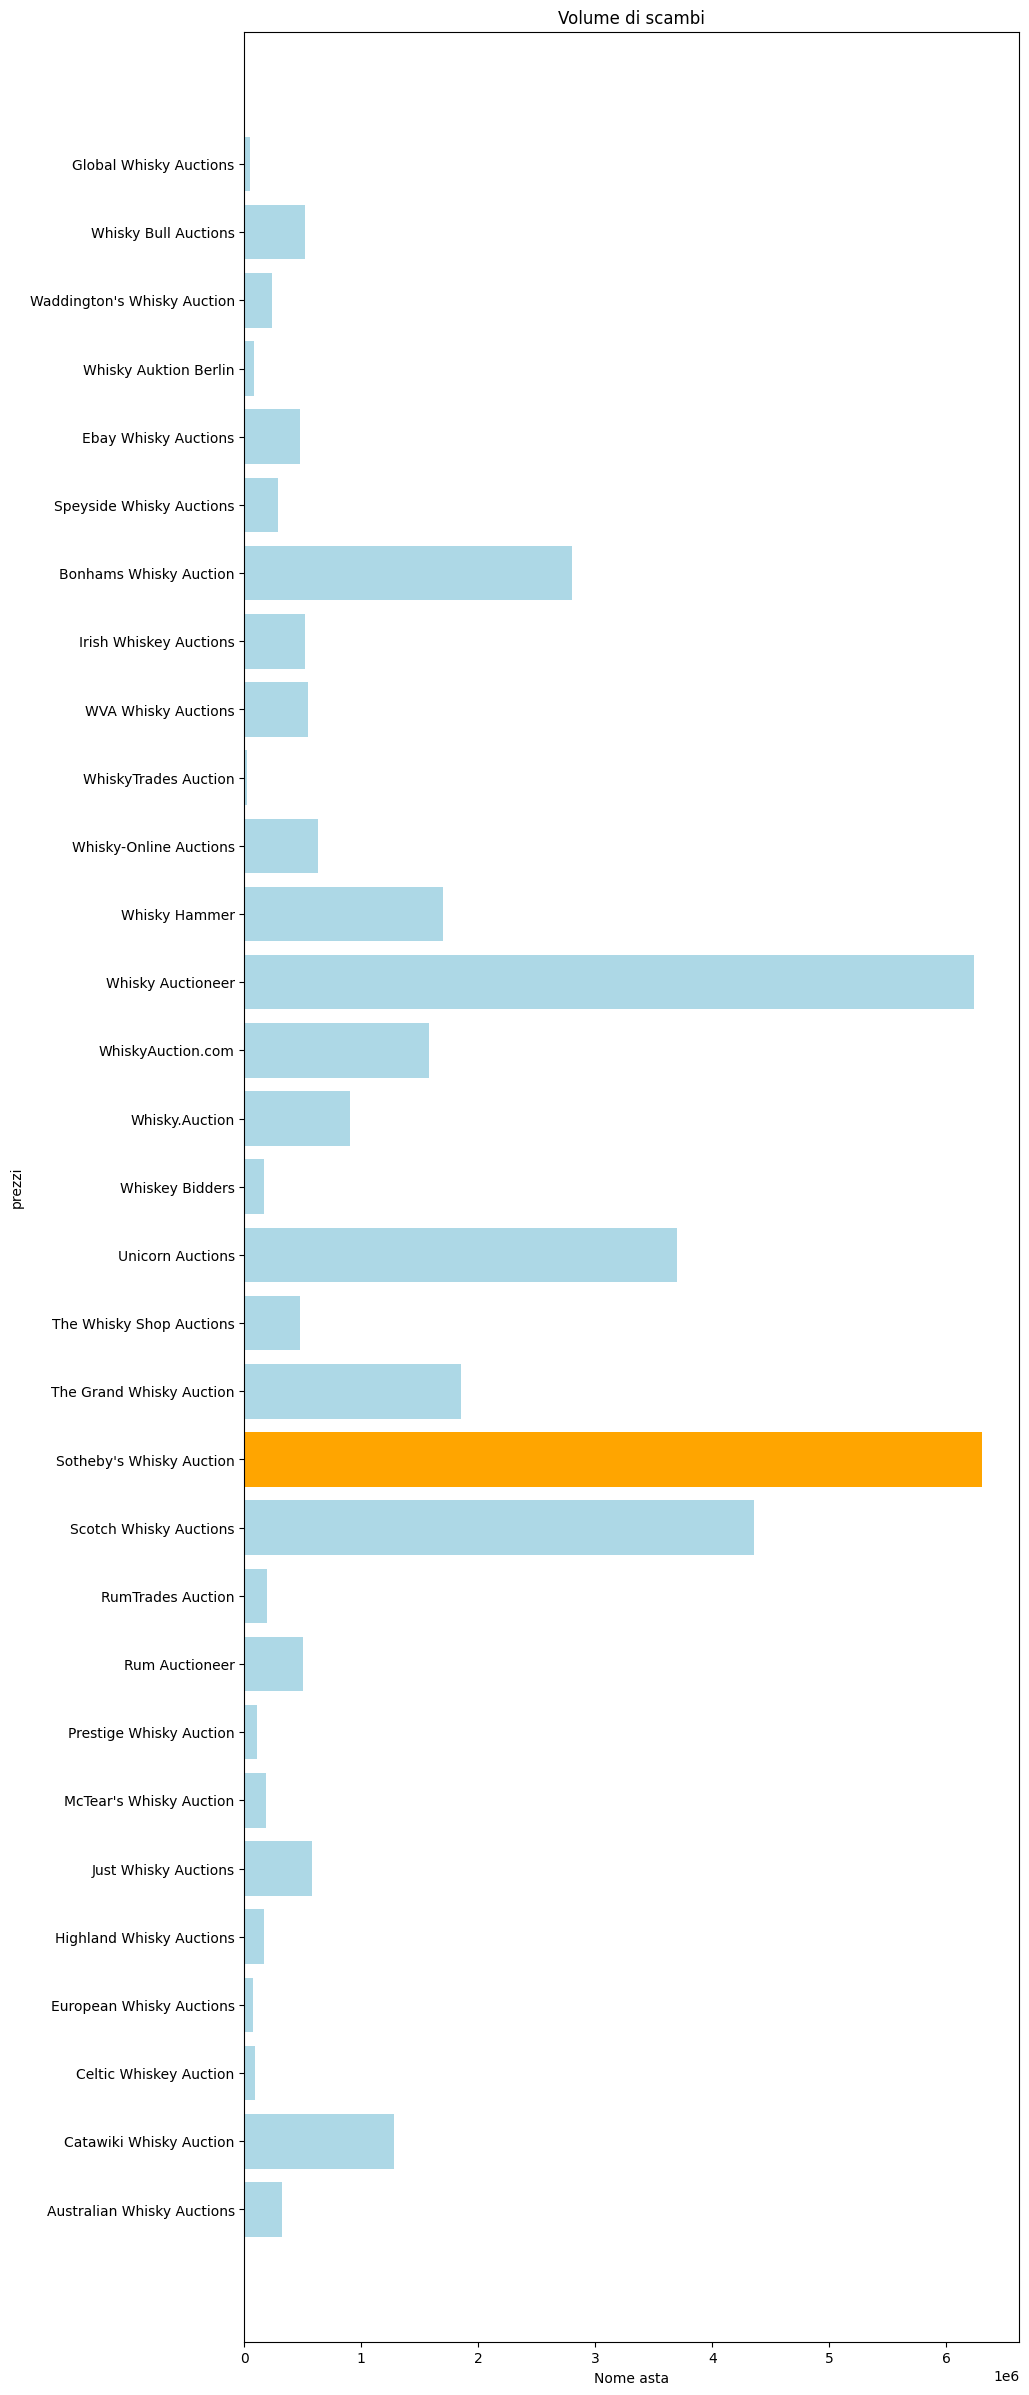

In [50]:
# Plotto per vedere visivamente
fig,ax = plt.subplots(figsize=(10,30))


colors = ['orange' if auction == asta_piu_redditizia['auction_name'] else 'lightblue' for auction in df['auction_name']]
ax.barh(df["auction_name"], df["auction_trading_volume"],color=colors)

ax.set(title="Volume di scambi", xlabel="Nome asta", ylabel="prezzi")


2. L'asta che ha avuto la bottiglia meno costosa (offerta minima più bassa):

Per trovare l'asta con l'offerta minima più bassa, cerco il valore minimo della colonna `winning_bid_min` e identifico l'asta corrispondente:

In [24]:
# Troviamo l'asta con l'offerta minima più bassa
asta_bottiglia_meno_costosa = df.loc[df['winning_bid_min'].idxmin()]

print(f"L'asta con la bottiglia meno costosa è: {asta_bottiglia_meno_costosa['auction_name']}")
print(f"Offerta minima: {asta_bottiglia_meno_costosa['winning_bid_min']}")


L'asta con la bottiglia meno costosa è: Catawiki Whisky Auction
Offerta minima: 0.0


3. L'asta che ha venduto il maggior numero di lotti

Per trovare l'asta con il maggior numero di lotti venduti,  cerco il massimo valore nella colonna `auction_lots_count`:

In [25]:
# Troviamo l'asta con il numero massimo di lotti venduti
asta_maggior_numero_lotti = df.loc[df['auction_lots_count'].idxmax()]

print(f"L'asta con il maggior numero di lotti venduti è: {asta_maggior_numero_lotti['auction_name']}")
print(f"Numero di lotti venduti: {asta_maggior_numero_lotti['auction_lots_count']}")


L'asta con il maggior numero di lotti venduti è: Unicorn Auctions
Numero di lotti venduti: 16274


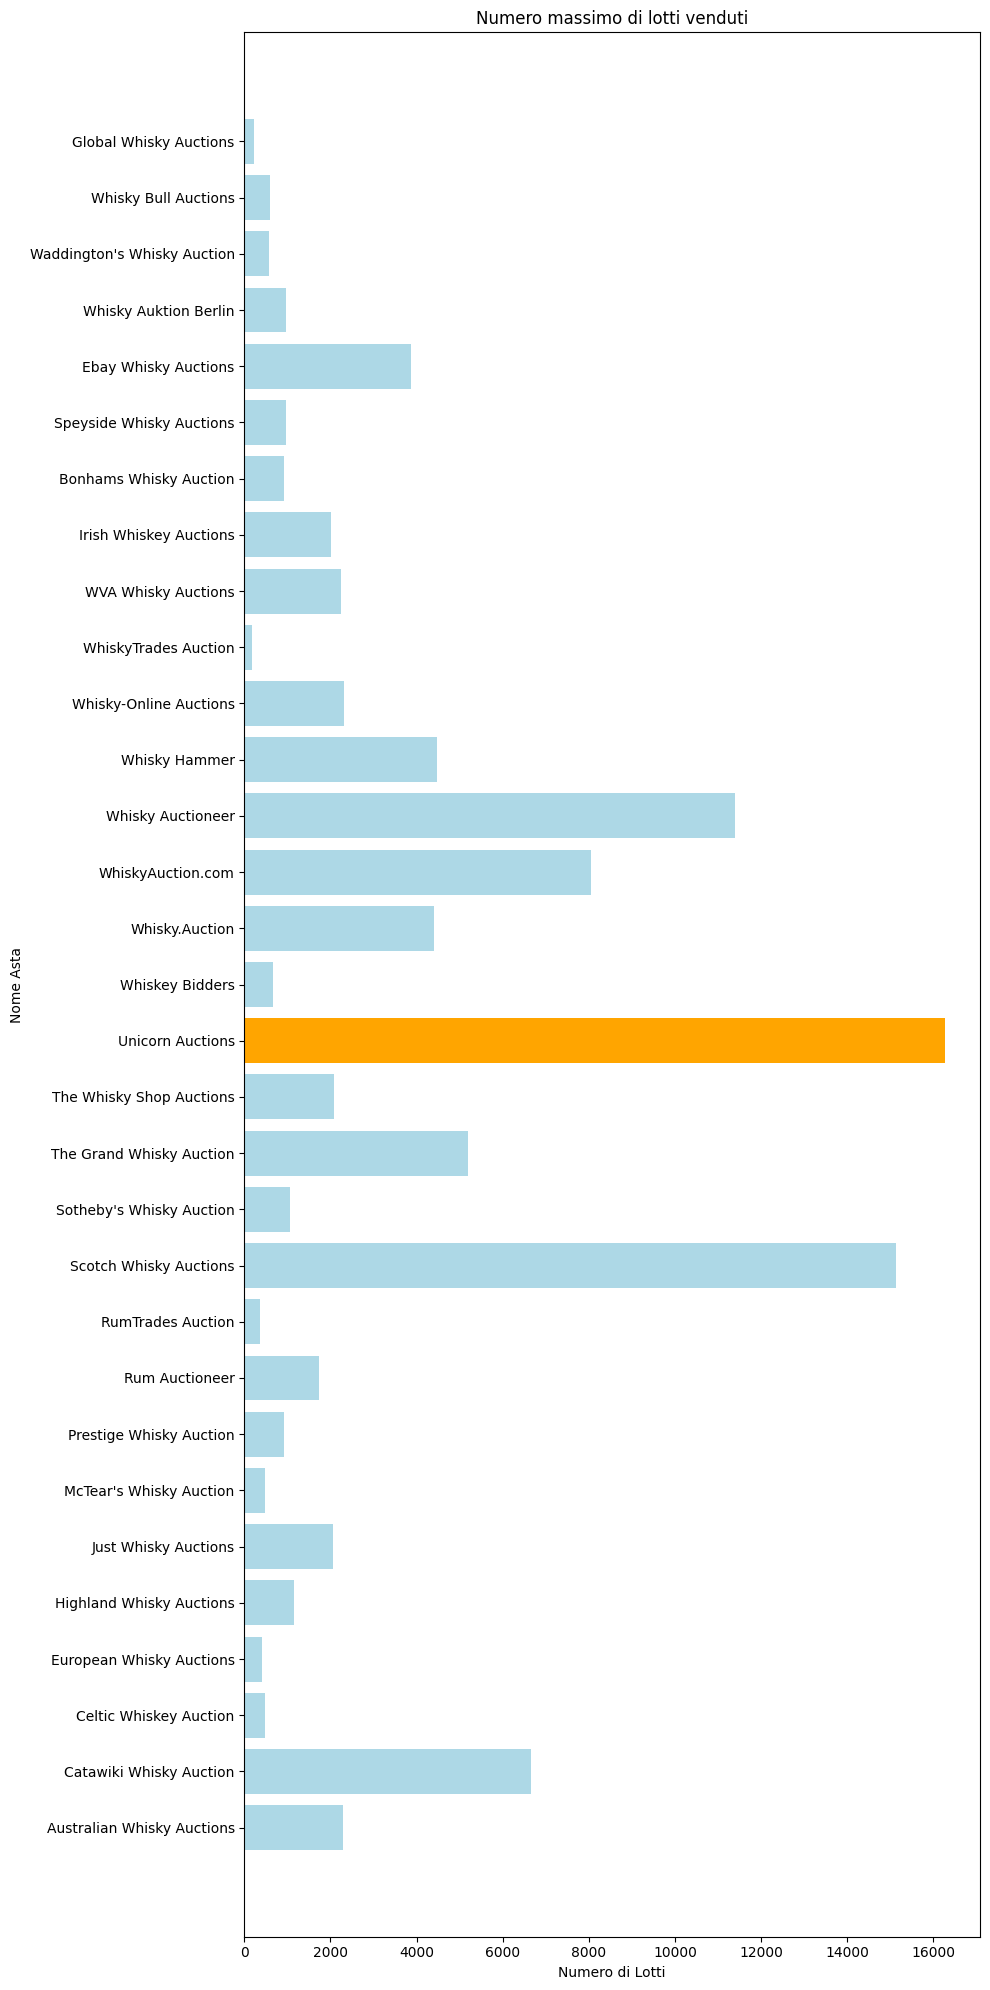

In [51]:
# Plotto per vedere visivamente
fig, ax = plt.subplots(figsize=(10, 20))

# Colori: assegniamo il colore 'lightblue' per tutte le aste, e 'red' per quella con il numero massimo di lotti
colors = ['orange' if auction == asta_maggior_numero_lotti['auction_name'] else 'lightblue' for auction in df['auction_name']]

# Crea il grafico a barre orizzontale
ax.barh(df["auction_name"], df["auction_lots_count"], color=colors)

# Aggiungi titolo e etichette
ax.set(title="Numero massimo di lotti venduti", xlabel="Numero di Lotti", ylabel="Nome Asta")

# Mostra il grafico
plt.tight_layout()
plt.show()

4. Numero totale di bottiglie vendute in tutte le aste

Per calcolare il numero totale di bottiglie (lotti) venduti in tutte le aste, sommo la colonna `auction_lots_count`:

In [26]:
# Sommiamo il numero di lotti venduti in tutte le aste
numero_totale_lotti = df['auction_lots_count'].sum()

print(f"Il numero totale di bottiglie vendute in tutte le aste è: {numero_totale_lotti}")


Il numero totale di bottiglie vendute in tutte le aste è: 4039007


# 2. Cercare uno o più dataset su [www.dati.gov.it](https://www.dati.gov.it) e scaricare i dati via http e usarli

Il sito è orribile, sto provando a scegliere un pacchetto, dalla lista che mi esce fuori da qui:
https://dati.gov.it/opendata/api/3/action/package_list

e interrogare i singoli con:
https://www.dati.gov.it/opendata/api/3/action/package_show?id={id-dataset}

In [106]:
import requests
import pandas as pd

# URL dell'API per il dataset
api_url = "https://www.dati.gov.it/opendata/api/3/action/package_show?id=catalogo-minori"

# Fai una richiesta GET all'API per ottenere i metadati
response = requests.get(api_url)

# Controlliamo se la richiesta è stata corretta
if response.status_code == 200:
    data = response.json()
    #scavo per prendere il dato con il link al csv
    resources = data['result']['resources']
    
    # Visualizziamo le informazioni per vedere dove si trova il link al file
    # print(data)
else:
    print("Errore nella richiesta API:", response.status_code)
    
df = pd.DataFrame(resources)

In [75]:
pd.set_option('display.max_colwidth', None)

df

,access_url,cache_last_updated,cache_url,created,description,distribution_format,distribution_ref,format,hash,id,...,name,package_id,position,resource_type,rights,size,state,uri,url,url_type
0,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/450fa5a0-5594-4e00-a41f-eb6f7cd24255/download/catalogo-offerta-servizi-minori.csv,None,None,2024-10-06T17:33:06.852505,File contentente il catalogo offerta servizi minori,CSV,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/450fa5a0-5594-4e00-a41f-eb6f7cd24255,CSV,b8d87ce12b859530ee1f0b0de0c4fa51,9dc9e92d-7d33-44a6-8186-a1bdbc3230e5,...,Catalogo offerta servizi minori.csv,38bc5a51-26ca-4cdb-97b2-d8db1ea65d7f,0,None,http://publications.europa.eu/resource/authority/access-right/PUBLIC,None,active,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/450fa5a0-5594-4e00-a41f-eb6f7cd24255,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/450fa5a0-5594-4e00-a41f-eb6f7cd24255/download/catalogo-offerta-servizi-minori.csv,None
1,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/e88a33dd-981a-4263-b958-b9279e2c655a/download/scheda_dataset_catalogo_minori.xls,None,None,2024-10-06T17:33:06.852508,Legenda catalogo telematico dell’offerta dei servizi per minori,XLS,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/e88a33dd-981a-4263-b958-b9279e2c655a,XLS,3d43779949879ac5c1663fa3030aafaa,01c1731f-17c0-4785-95d0-6b3be352b188,...,SCHEDA_Dataset_Catalogo_minori.xls,38bc5a51-26ca-4cdb-97b2-d8db1ea65d7f,1,None,http://publications.europa.eu/resource/authority/access-right/PUBLIC,None,active,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/e88a33dd-981a-4263-b958-b9279e2c655a,https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/e88a33dd-981a-4263-b958-b9279e2c655a/download/scheda_dataset_catalogo_minori.xls,None


Provo a prendere il csv chiamato Catalogo offerta servizi minori.csv	

In [78]:
csv_url = df["access_url"][0]
csv_url

'https://dati.puglia.it/ckan/dataset/0b43daa2-8b5e-461e-a85d-1d82bc710b11/resource/450fa5a0-5594-4e00-a41f-eb6f7cd24255/download/catalogo-offerta-servizi-minori.csv'

In [91]:
# creo un nuovo df speriamo bene...

df2 = pd.read_csv(csv_url)
df2.head()

,DENOMINAZIONE,TITOLARE,GESTORE,PROVINCIA,AMBITO,COMUNE,INDIRIZZO,SERVIZIO,RICETTIVITA,OPERATORI_IN_ORGANICO,MENSA,TRASPORTO,TARIFFE
0,CENTRO SOCIO-EDUCATIVO GRANELLI DI SENAPE,ASSOCIAZIONE THEOTOKOS,PARROCCHIA S. EUSTACHIO - IMPRESA SOCIALE,BA,GRUMO APPULA,Acquaviva delle Fonti,PIAZZA DEI MARTIRI SN,Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007),60 posti,9,NO,SI,Integrazione Tariffa Mensile in caso di utente disabile 700 euro; Tariffa Mensile 456 euro
1,"CENTRO DIURNO PER MINORI ""S.ANTONIO""- OPERA D.G.",PROVINCIA ITALIANA DELLA CONGREGAZIONE DEI SERVI DELLA CARITA' - O.D.G,NaN,BA,PUTIGNANO,Alberobello,VIA BAINSIZZA 7,Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007),30 posti,5,NO,NO,Tariffa Mensile 500 euro; Integrazione Tariffa Mensile in caso di utente disabile 500 euro
2,ZAGAZÙ,COOPERATIVA SOCIALE SOLIDARIETA' A.R.L.,NaN,LE,GALLIPOLI,Alezio,Via Matteotti -,Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007),30 posti,6,NO,SI,"Tariffa Mensile 278,85 euro; Tariffa Mensile 287,85 euro; Integrazione Tariffa Mensile in caso di utente disabile 400 euro"
3,A.P.S. PENTA GROUP,A.P.S. PENTA GROUP,NaN,BA,ALTAMURA,Altamura,Via XX Settembre 9,Servizio Educativo per il Tempo Libero (art. 103 Reg. R. n.4/2007),24 posti,4,NO,SI,"Tariffa giornaliera 16,05 euro; Tariffa giornaliera 11,47 euro"
4,BIANCAAMANO S.C.S.,BIANCAMANO S.C.S.,NaN,BA,ALTAMURA,Altamura,Via XX Settembre 9,Servizio Educativo per il Tempo Libero (art. 103 Reg. R. n.4/2007),24 posti,5,NO,SI,"Tariffa giornaliera 16,05 euro; Tariffa giornaliera 11,47 euro"


In [86]:
df2.columns

Index(['DENOMINAZIONE', 'TITOLARE', 'GESTORE', 'PROVINCIA', 'AMBITO', 'COMUNE',
       'INDIRIZZO', 'SERVIZIO', 'RICETTIVITA', 'OPERATORI_IN_ORGANICO',
       'MENSA', 'TRASPORTO', 'TARIFFE'],
      dtype='object')

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DENOMINAZIONE          211 non-null    object
 1   TITOLARE               211 non-null    object
 2   GESTORE                37 non-null     object
 3   PROVINCIA              211 non-null    object
 4   AMBITO                 211 non-null    object
 5   COMUNE                 211 non-null    object
 6   INDIRIZZO              211 non-null    object
 7   SERVIZIO               211 non-null    object
 8   RICETTIVITA            211 non-null    object
 9   OPERATORI_IN_ORGANICO  211 non-null    int64 
 10  MENSA                  211 non-null    object
 11  TRASPORTO              211 non-null    object
 12  TARIFFE                208 non-null    object
dtypes: int64(1), object(12)
memory usage: 21.6+ KB


In [92]:
# Dalla colonna ricettivita elimino la parola `posti`
df2['RICETTIVITA'] = df2['RICETTIVITA'].str.extract(r'(\d+)').astype(int)

In [93]:
df2.head()

,DENOMINAZIONE,TITOLARE,GESTORE,PROVINCIA,AMBITO,COMUNE,INDIRIZZO,SERVIZIO,RICETTIVITA,OPERATORI_IN_ORGANICO,MENSA,TRASPORTO,TARIFFE
0,CENTRO SOCIO-EDUCATIVO GRANELLI DI SENAPE,ASSOCIAZIONE THEOTOKOS,PARROCCHIA S. EUSTACHIO - IMPRESA SOCIALE,BA,GRUMO APPULA,Acquaviva delle Fonti,PIAZZA DEI MARTIRI SN,Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007),60,9,NO,SI,Integrazione Tariffa Mensile in caso di utente disabile 700 euro; Tariffa Mensile 456 euro
1,"CENTRO DIURNO PER MINORI ""S.ANTONIO""- OPERA D.G.",PROVINCIA ITALIANA DELLA CONGREGAZIONE DEI SERVI DELLA CARITA' - O.D.G,NaN,BA,PUTIGNANO,Alberobello,VIA BAINSIZZA 7,Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007),30,5,NO,NO,Tariffa Mensile 500 euro; Integrazione Tariffa Mensile in caso di utente disabile 500 euro
2,ZAGAZÙ,COOPERATIVA SOCIALE SOLIDARIETA' A.R.L.,NaN,LE,GALLIPOLI,Alezio,Via Matteotti -,Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007),30,6,NO,SI,"Tariffa Mensile 278,85 euro; Tariffa Mensile 287,85 euro; Integrazione Tariffa Mensile in caso di utente disabile 400 euro"
3,A.P.S. PENTA GROUP,A.P.S. PENTA GROUP,NaN,BA,ALTAMURA,Altamura,Via XX Settembre 9,Servizio Educativo per il Tempo Libero (art. 103 Reg. R. n.4/2007),24,4,NO,SI,"Tariffa giornaliera 16,05 euro; Tariffa giornaliera 11,47 euro"
4,BIANCAAMANO S.C.S.,BIANCAMANO S.C.S.,NaN,BA,ALTAMURA,Altamura,Via XX Settembre 9,Servizio Educativo per il Tempo Libero (art. 103 Reg. R. n.4/2007),24,5,NO,SI,"Tariffa giornaliera 16,05 euro; Tariffa giornaliera 11,47 euro"


In [96]:
# Trovo la struttura con più posti e poi con più operatori
struttura_piu_operatori = df2.loc[df2['OPERATORI_IN_ORGANICO'].idxmax()]

struttura_piu_ricettivita = df2.loc[df2['RICETTIVITA'].idxmax()]

print(f"La struttura con più operatori è: {struttura_piu_operatori['DENOMINAZIONE']}")
print(f"Titolare: {struttura_piu_operatori['TITOLARE']}")
print(f"Gestore: {struttura_piu_operatori['GESTORE']}")
print(f"Provincia: {struttura_piu_operatori['PROVINCIA']}")
print(f"Ambito: {struttura_piu_operatori['AMBITO']}")
print(f"Comune: {struttura_piu_operatori['COMUNE']}")
print(f"Indirizzo: {struttura_piu_operatori['INDIRIZZO']}")
print(f"Servizio: {struttura_piu_operatori['SERVIZIO']}")
print("---")
print(f"La struttura con più ricettività: {struttura_piu_ricettivita['DENOMINAZIONE']}")
print(f"Titolare: {struttura_piu_operatori['TITOLARE']}")
print(f"Gestore: {struttura_piu_operatori['GESTORE']}")
print(f"Provincia: {struttura_piu_operatori['PROVINCIA']}")
print(f"Ambito: {struttura_piu_operatori['AMBITO']}")
print(f"Comune: {struttura_piu_operatori['COMUNE']}")
print(f"Indirizzo: {struttura_piu_operatori['INDIRIZZO']}")
print(f"Servizio: {struttura_piu_operatori['SERVIZIO']}")



La struttura con più operatori è: PIETRO ALBEROTANZA
Titolare: CONGREGAZIONE SUORE MINIME DELLA PASSIONE DI N.S.G.C.
Gestore: nan
Provincia: BA
Ambito: BARI
Comune: Bari
Indirizzo: Trav. 2° di via Umbria 5
Servizio: Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007)
---
La struttura con più ricettività: AGORIA
Titolare: CONGREGAZIONE SUORE MINIME DELLA PASSIONE DI N.S.G.C.
Gestore: nan
Provincia: BA
Ambito: BARI
Comune: Bari
Indirizzo: Trav. 2° di via Umbria 5
Servizio: Centro Socio Educativo Diurno (art. 52 Reg. R. n.4/2007)


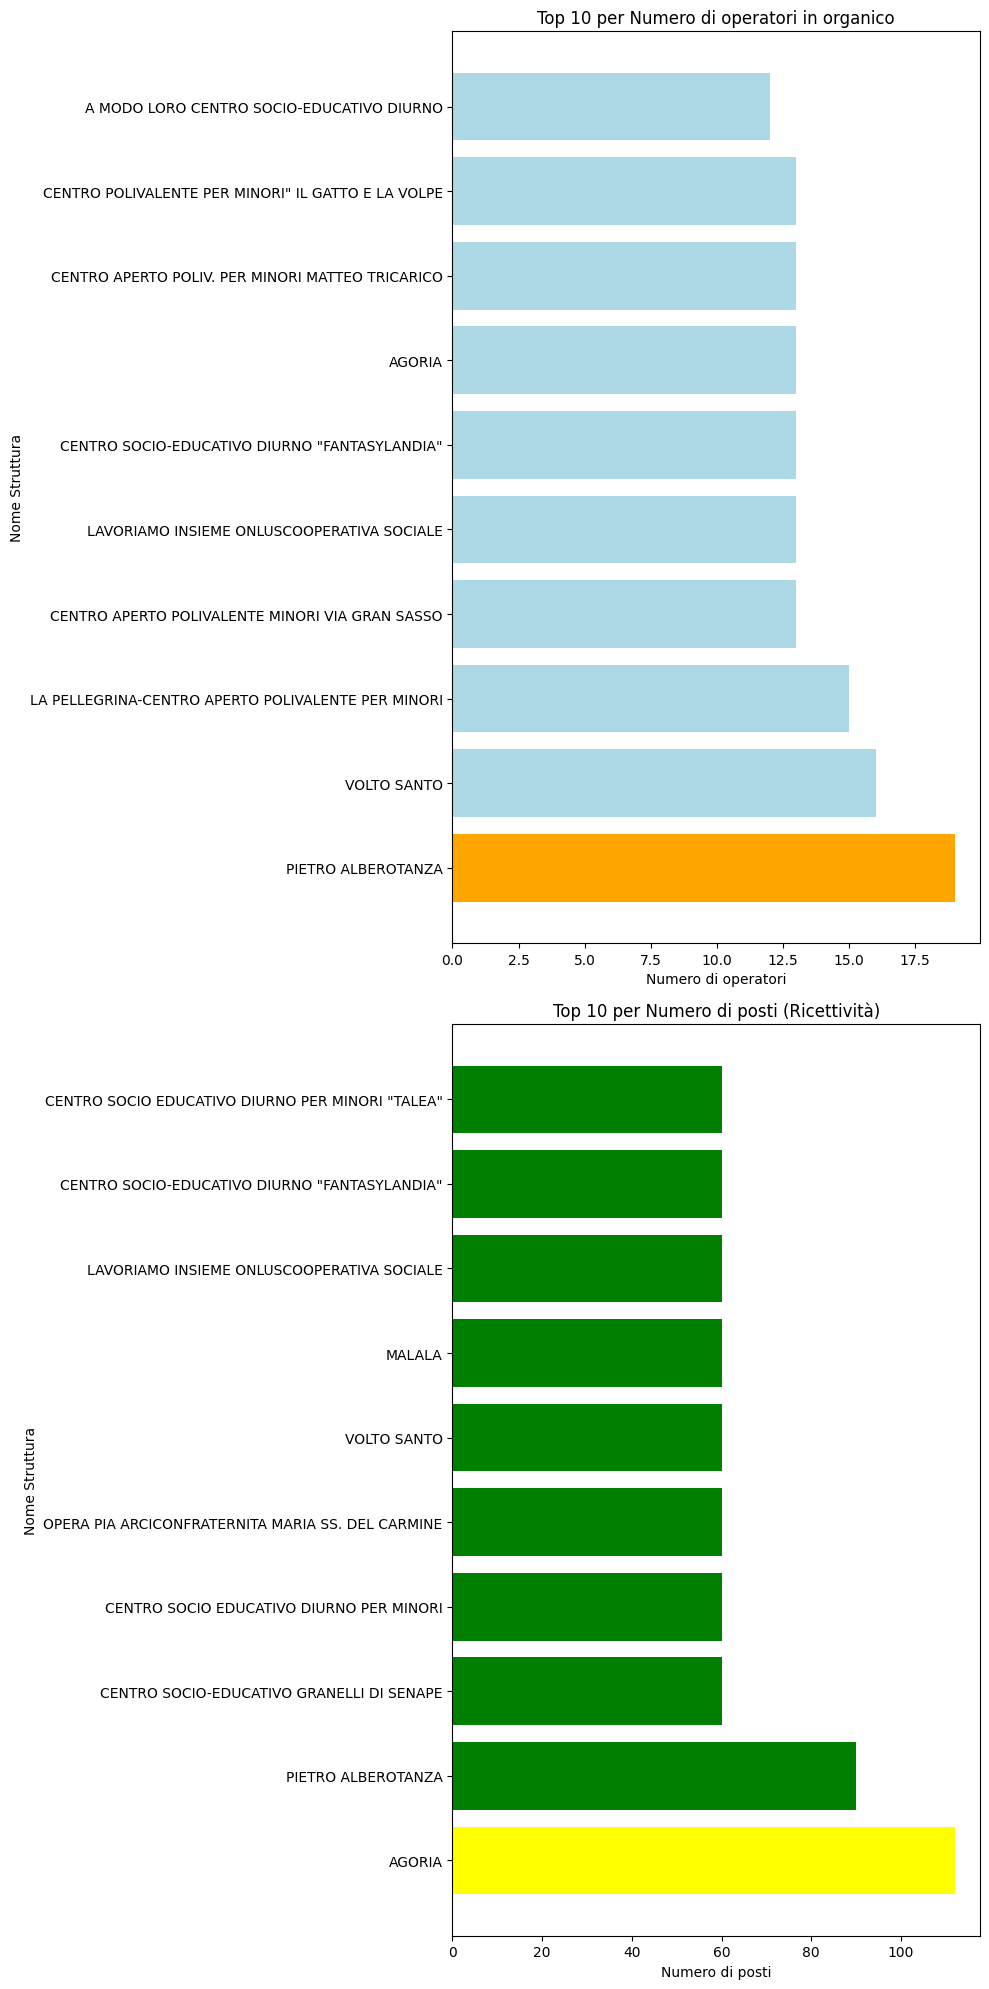

In [110]:
# Ordinare per il numero di operatori in organico e prendere i primi 10
df_top10_operatori = df2.sort_values(by="OPERATORI_IN_ORGANICO", ascending=False).head(10)

# Ordinare per la ricettività e prendere i primi 10
df_top10_ricettivita = df2.sort_values(by="RICETTIVITA", ascending=False).head(10)

# Plotto per vedere visivamente
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

# Colori: assegniamo il colore 'orange' per la struttura con più operatori e 'lightblue' per le altre
colors_operatori = ['orange' if auction == df_top10_operatori['DENOMINAZIONE'].iloc[0] else 'lightblue' for auction in df_top10_operatori['DENOMINAZIONE']]

# Colori: assegniamo il colore 'yellow' per la struttura con più ricettività e 'green' per le altre
colors_ricettivita = ['yellow' if auction == df_top10_ricettivita['DENOMINAZIONE'].iloc[0] else 'green' for auction in df_top10_ricettivita['DENOMINAZIONE']]

# Crea il grafico a barre orizzontale per gli operatori
ax[0].barh(df_top10_operatori["DENOMINAZIONE"], df_top10_operatori["OPERATORI_IN_ORGANICO"], color=colors_operatori)
ax[0].set_title("Top 10 per Numero di operatori in organico")
ax[0].set_xlabel("Numero di operatori")
ax[0].set_ylabel("Nome Struttura")

# Crea il grafico a barre orizzontale per la ricettività
ax[1].barh(df_top10_ricettivita["DENOMINAZIONE"], df_top10_ricettivita["RICETTIVITA"], color=colors_ricettivita)
ax[1].set_title("Top 10 per Numero di posti (Ricettività)")
ax[1].set_xlabel("Numero di posti")
ax[1].set_ylabel("Nome Struttura")

# Mostra il grafico
plt.tight_layout()
plt.show()